# Milestone Fase 1

# i. Perkenalan

========================================================================

**Nama** : Aditya Nur Wijaya


**Batch** : HCK-024


**Objective** :
Membangun model prediksi berbasis machine learning untuk mendeteksi secara dini risiko penyakit jantung. Data input mencakup faktor-faktor medis dan gaya hidup seperti kadar kolesterol, tekanan darah sistolik, tingkat stres, dan kebiasaan olahraga. Model ini bertujuan untuk mendukung pencegahan proaktif melalui rekomendasi yang personal.

metode yang di gunakan: 

- Logistic Regression 
- KNN
- SVM
- Decision Tree
- Random Forest
- Gradient Boosting

========================================================================

**Problem**

Penyakit jantung merupakan salah satu penyebab utama kematian di Indonesia. Penyakit ini dapat muncul tanpa gejala yang jelas hingga mencapai tahap kritis. Oleh karena itu, deteksi dini risiko penyakit jantung sangat penting untuk mencegah komplikasi lebih lanjut dan meningkatkan kualitas hidup pasien. Namun, penilaian risiko sering kali sulit dilakukan tanpa data medis yang jelas.

**Justifikasi**

- Berdasarkan Global Burden of Desease dan Institute for Health Metrics and Evaluation (IHME) 2014-2019 penyakit jantung menjadi penyebab kematian tertinggi di Indonesia. (sehatnegeriku.kemkes.go.id)

- Teknologi machine learning semakin menunjukkan potensinya dalam berbagai industri, tetapi adopsi di sektor kesehatan, khususnya di negara berkembang seperti Indonesia, masih dalam tahap awal. Padahal, penerapan yang tepat dapat membawa perubahan besar dalam mendukung diagnosis lebih cepat, memprediksi risiko penyakit dengan akurat, dan meningkatkan efisiensi pelayanan kesehatan.

**User**
Dokter Spesialis/Pasien.

## Pertanyaan

Jawab pertanyaan berikut:

- Jelaskan latar belakang adanya bagging dan cara kerja bagging !

- Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

- Jelaskan apa yang dimaksud dengan Cross Validation !

1. Bagging (Bootstrap Aggregating):
Bagging itu seperti konsep "banyak kepala lebih baik dari satu kepala". Cara kerjanya:
Ambil beberapa sampel data secara acak (dengan pengembalian)
Buat model untuk tiap sampel data tersebut
Gabungkan hasil prediksi dari semua model dengan cara voting (untuk klasifikasi) atau rata-rata (untuk regresi)
Tujuannya untuk mengurangi variance dan menghindari overfitting.


2. - Random Forest:

Membuat banyak pohon keputusan secara paralel/bersamaan
Setiap pohon dibuat independen/tidak saling bergantung
Hasil akhir berdasarkan voting mayoritas dari semua pohon

- XGBoost:

Membuat pohon keputusan secara berurutan/sequential
Setiap pohon baru fokus memperbaiki kesalahan pohon sebelumnya
Memberikan bobot lebih pada data yang salah diprediksi
Hasil akhir adalah kombinasi berbobot dari semua pohon

3. Bayangkan seperti ujian di sekolah. Daripada belajar dari semua materi dan ujian sekali saja, lebih baik:

Bagi materi jadi beberapa bagian (fold), Latihan dengan sebagian materi, Test dengan materi yang belum dipelajari, Ulangi proses dengan bagian materi yang berbeda, Rata-ratakan nilai dari semua test

# ii. Import Libraries

In [226]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Preprocessing and Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Persistence
import pickle

# iii. Data Loading

## Deskripsi dataset

| Feature Name | Data Type | Description |
|---|---|---|
| Age | Integer | Age of the patient in years |
| Sex | Categorical (M/F) | Sex of the patient (M: Male, F: Female) |
| ChestPainType | Categorical (TA, ATA, NAP, ASY) | Type of chest pain experienced by the patient <br> - TA: Typical Angina <br> - ATA: Atypical Angina <br> - NAP: Non-Anginal Pain <br> - ASY: Asymptomatic |
| RestingBP | Integer | Resting blood pressure in mm Hg |
| Cholesterol | Integer | Serum cholesterol level in mm/dl |
| FastingBS | Binary (0/1) | Fasting blood sugar level <br> - 1: FastingBS > 120 mg/dl <br> - 0: Otherwise |
| RestingECG | Categorical (Normal, ST, LVH) | Resting electrocardiogram results <br> - Normal: Normal <br> - ST: Having ST-T wave abnormality <br> - LVH: Showing probable or definite left ventricular hypertrophy |
| MaxHR | Integer | Maximum heart rate achieved during exercise (between 60 and 202) |
| ExerciseAngina | Binary (Y/N) | Presence of exercise-induced angina (Y: Yes, N: No) |
| Oldpeak | Float | ST depression induced by exercise relative to rest |
| ST_Slope | Categorical (Up, Flat, Down) | The slope of the peak exercise ST segment <br> - Up: Upsloping <br> - Flat: Flat <br> - Down: Downsloping |
| HeartDisease | Binary (0/1) | Output class (0: No heart disease, 1: Heart disease) |

In [227]:
# membaca dataset
data = pd.read_csv("heart.csv")
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [228]:
# iii.3 Analisis Deskriptif
# Analisa awal untuk memahami distribusi data.
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [229]:
# Ubah nama kolom menjadi lowercase
data.columns = data.columns.str.lower()

# Tampilkan nama kolom setelah diubah
print(data.columns)

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')


# iv. Exploratory Data Analysis (EDA)

## Distribusi variabel numerik

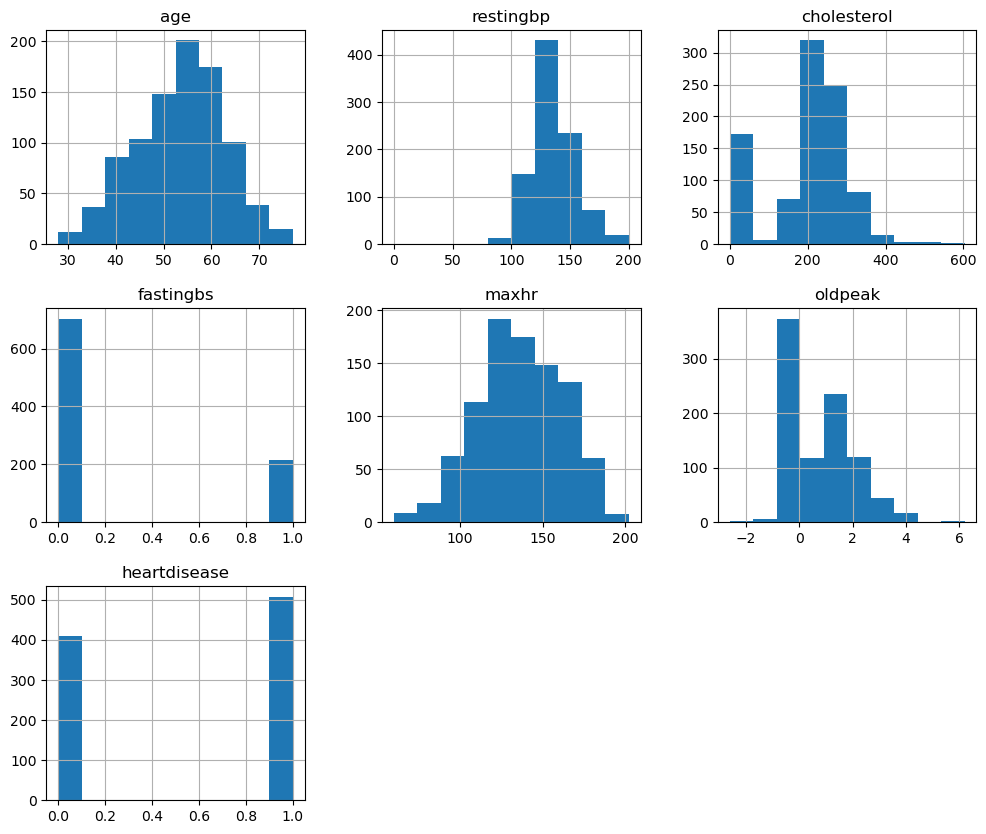

In [230]:
# iv.1 Distribusi Kolom Numeric
data.hist(figsize=(12, 10))
plt.show()

Usia (age) pasien terkonsentrasi di rentang 50-65 tahun, menunjukkan mayoritas pasien adalah usia paruh baya. Tekanan darah saat istirahat (restingbp) sebagian besar berada di kisaran 120-160 mmHg, dengan puncak di sekitar 140 mmHg.

Kadar kolesterol (cholesterol) memiliki distribusi yang cukup lebar, dengan konsentrasi tertinggi di sekitar 200-250 mg/dL. Gula darah puasa (fastingbs) menunjukkan pola binary yang jelas, dimana mayoritas pasien memiliki nilai 0 (normal) atau 1 (tinggi).

Detak jantung maksimum (maxhr) terdistribusi normal dengan puncak di sekitar 150 bpm. Oldpeak menunjukkan distribusi yang miring ke kanan dengan mayoritas nilai di sekitar 0-2.

Heart disease menunjukkan distribusi yang hampir seimbang antara pasien yang memiliki (1) dan tidak memiliki (0) penyakit jantung, dengan sedikit lebih banyak kasus positif.

## Heatmap

In [231]:
# # iv.2 Korelasi Antar Kolom
# # Mengubah kolom kategorikal menjadi numerik sebelum menghitung korelasi
# categorical_columns = data.select_dtypes(include=['object']).columns
# le = LabelEncoder()
# for col in categorical_columns:
#     data[col] = le.fit_transform(data[col])

In [232]:
# # Visualisasi korelasi
# plt.figure(figsize=(10, 8))
# sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
# plt.show()

Berdasarkan heatmap korelasi tersebut, saya dapat memberikan analisis singkat:

Variabel yang memiliki korelasi positif terkuat dengan penyakit jantung (heartdisease) adalah exercise angina (0.49), oldpeak (0.4), dan jenis kelamin/sex (0.31). Ini menunjukkan bahwa ketiga faktor tersebut cenderung meningkatkan risiko penyakit jantung.

Sebaliknya, ST_slope (-0.56), chest pain type (-0.39), dan maxhr (-0.4) menunjukkan korelasi negatif yang kuat dengan penyakit jantung. Ini mengindikasikan bahwa nilai yang lebih tinggi pada variabel-variabel tersebut cenderung menurunkan risiko penyakit jantung.

Beberapa korelasi menarik lainnya terlihat antara oldpeak dan exercise angina (0.41), serta antara age dan maxhr (-0.38). Sementara itu, variabel seperti restingECG dan restingbp menunjukkan korelasi yang relatif lemah dengan penyakit jantung, mengindikasikan bahwa faktor-faktor tersebut mungkin bukan prediktor yang kuat untuk penyakit jantung.

## Distribusi Target Variabel Penyakit Jantung

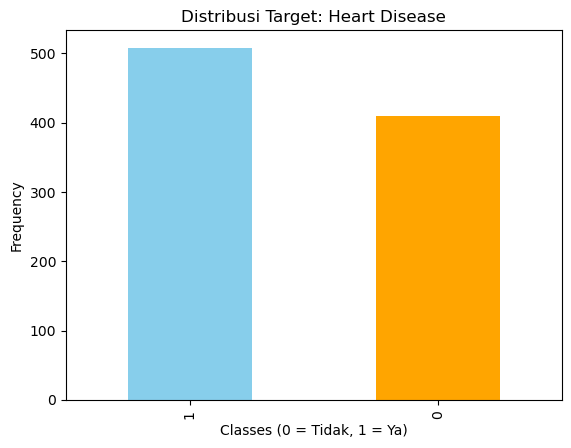

In [233]:
# Plot distribusi target
data['heartdisease'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribusi Target: Heart Disease')
plt.xlabel('Classes (0 = Tidak, 1 = Ya)')
plt.ylabel('Frequency')
plt.show()


Data menunjukkan adanya ketidakseimbangan kelas yang moderat dalam kasus penyakit jantung, dimana jumlah kasus positif (Ya) sebanyak 508 kasus sedikit lebih tinggi dibandingkan kasus negatif (Tidak) sebanyak 410 kasus, dengan rasio sekitar 55:45.

## Feature Kategorikal vs Positif Heartdisease

In [234]:
sex = data[data['heartdisease'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['heartdisease'] == 1]['chestpaintype'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['heartdisease'] == 1]['fastingbs'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['heartdisease'] == 1]['restingecg'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['heartdisease'] == 1]['exerciseangina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['heartdisease'] == 1]['st_slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

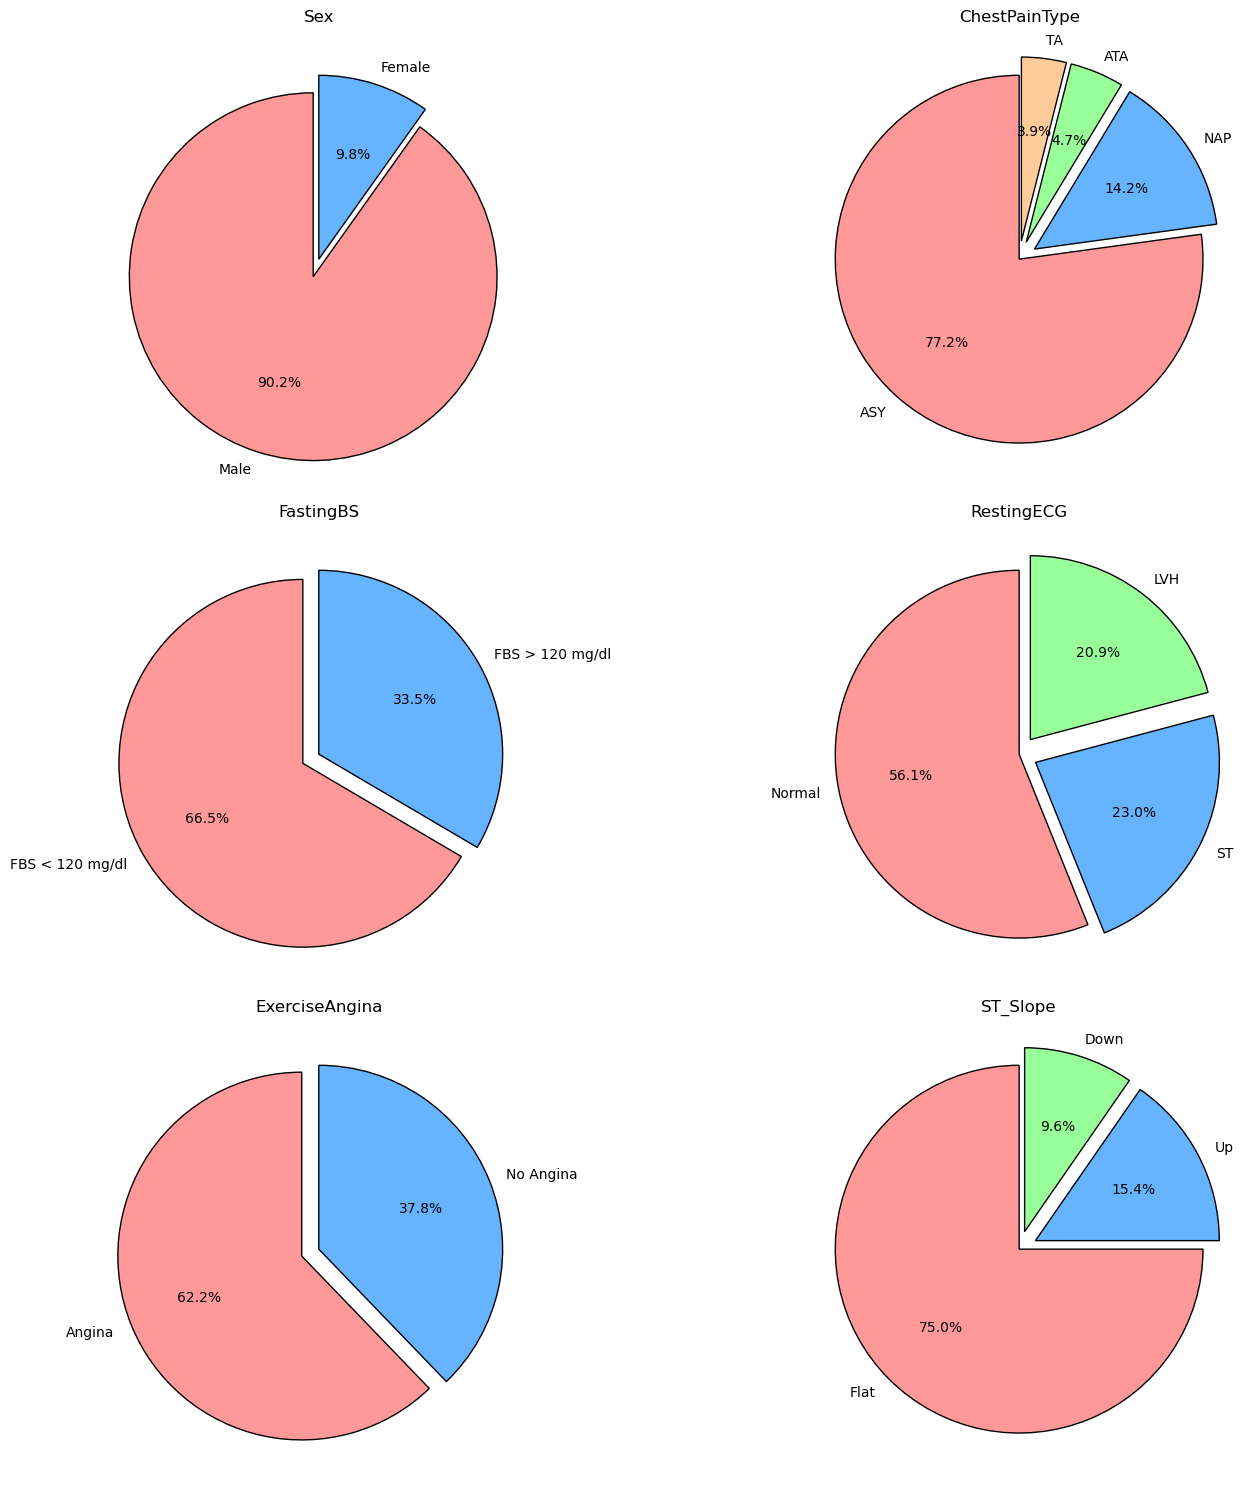

In [235]:
# Definisi warna
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Plot pie charts
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.pie(sex, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors[:2],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Sex')

plt.subplot(3, 2, 2)
plt.pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1, 0.1),
        colors=colors[:4], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ChestPainType')

plt.subplot(3, 2, 3)
plt.pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('FastingBS')

plt.subplot(3, 2, 4)
plt.pie(restecg, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        colors=colors[:3], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('RestingECG')

plt.subplot(3, 2, 5)
plt.pie(exang, labels=['Angina', 'No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ExerciseAngina')

plt.subplot(3, 2, 6)
plt.pie(slope, labels=['Flat', 'Up', 'Down'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        colors=colors[:3], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ST_Slope')

plt.tight_layout()
plt.show()


* Dari seluruh pasien penyakit jantung, 90% adalah laki-laki. Ini menunjukkan bahwa laki-laki memiliki risiko jauh lebih tinggi terkena penyakit jantung.

* Pada jenis nyeri dada, tipe ASY (tanpa gejala) mendominasi dengan 77% yang berujung pada penyakit jantung. Ini berarti banyak penderita tidak menyadari gejala awal karena tidak merasakan sakit.

* Pasien dengan kadar gula darah puasa di bawah 120 mg/dl justru menunjukkan risiko tinggi terkena penyakit jantung. Ini menarik karena berbeda dengan anggapan umum.

* Dalam pembacaan EKG saat istirahat, hasil "Normal" justru menunjukkan kemungkinan 56% terkena penyakit jantung, lebih tinggi dibanding hasil LVH dan ST.

* Munculnya angina (nyeri dada) saat berolahraga menjadi indikator kuat adanya masalah jantung.

* Dalam pembacaan ST_Slope, level "Flat" mendominasi 75% kasus, yang bisa menjadi penanda penting dalam mendeteksi masalah jantung.

Kesimpulan: Faktor-faktor di atas bisa menjadi penanda awal risiko penyakit jantung, terutama pada laki-laki, meski tanpa gejala nyeri dada yang jelas.

## Distribusi dan Frekuensi Kasus Penyakit Jantung.

/var/folders/nx/5rf0d08544j82gh3ljbrs7km0000gn/T/ipykernel_2373/1674738693.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=heart_disease_counts, palette=colors)


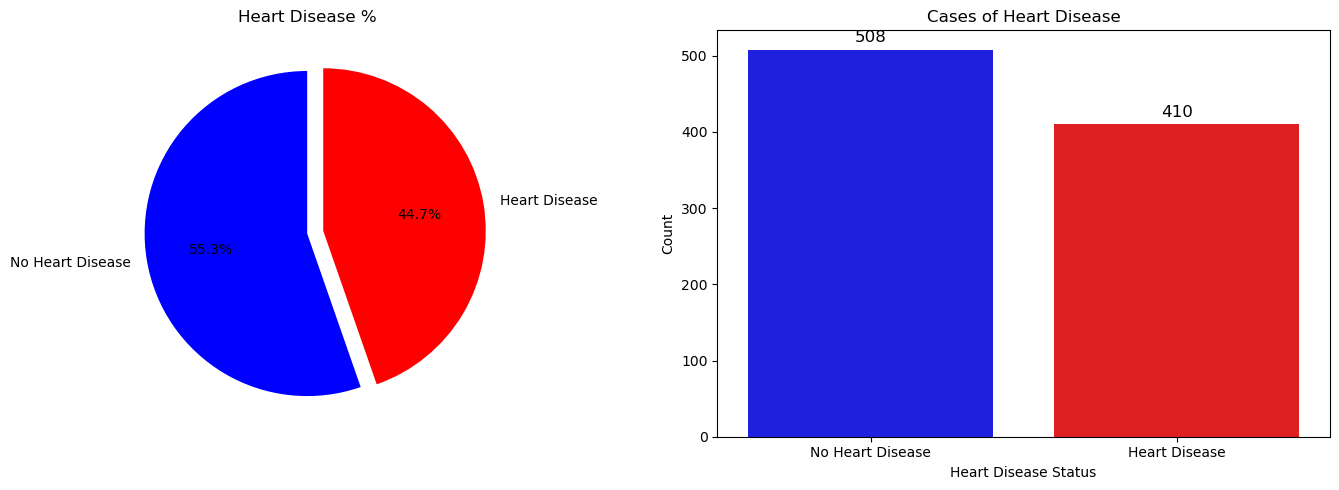

In [236]:
# Hitung distribusi heartdisease
heart_disease_counts = data['heartdisease'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
colors = ['blue', 'red']

# Buat pie chart
plt.figure(figsize=(14, 5))

# Subplot 1: Pie chart
plt.subplot(1, 2, 1)
plt.pie(heart_disease_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Heart Disease %')

# Subplot 2: Bar chart
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=heart_disease_counts, palette=colors)
for i, count in enumerate(heart_disease_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)
plt.title('Cases of Heart Disease')
plt.ylabel('Count')
plt.xlabel('Heart Disease Status')

plt.tight_layout()
plt.show()


- Pie chart menunjukkan distribusi kasus penyakit jantung dengan 55,3% pasien tidak memiliki penyakit jantung dan 44,7% pasien memilikinya, menunjukkan perbedaan relatif kecil sebesar 10,6%.

- Bar chart menunjukkan jumlah kasus aktual dengan 508 orang tanpa penyakit jantung dan 410 orang dengan penyakit jantung, dari total 918 sampel dalam penelitian ini.

Ini menunjukkan bahwa hampir setengah dari populasi yang diteliti memiliki penyakit jantung, yang merupakan proporsi yang cukup signifikan. Hal ini bisa menjadi indikator pentingnya upaya pencegahan dan deteksi dini penyakit jantung dalam populasi yang diteliti.

# v. Feature Engineering

In [237]:
# v.1 Handle Missing Value
# Memastikan tidak ada nilai yang hilang dalam dataset.
print(data.isna().sum())

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64


Tidak terdapat missing value pada semua kolom.

In [238]:
# v.2 Split X, Y Feature & Target
X = data.drop("heartdisease", axis=1)
y = data["heartdisease"]

Memisahkan fitur dan target 

In [239]:
# v.3 Split between Train-set and Test-set
# Membagi data menjadi data latih dan uji.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB



Membagi data menjadi data latih dan uji.

In [241]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
outlier_info = []

for col in numeric_columns:
    values = data[col].values
    q1, q3 = np.percentile(values, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outlier_mask = (values < lower_bound) | (values > upper_bound)
    outlier_count = np.sum(outlier_mask)
    
    outlier_info.append({
        'Column': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': outlier_count,
        'Outliers Percent': outlier_count / len(values) * 100
    })

outlier_data = pd.DataFrame(outlier_info)
print(outlier_data)

         Column  Lower Bound  Upper Bound  Outliers Count  Outliers Percent
0           age       27.500       79.500               0          0.000000
1     restingbp       90.000      170.000              28          3.050109
2   cholesterol       32.625      407.625             183         19.934641
3     fastingbs        0.000        0.000             214         23.311547
4         maxhr       66.000      210.000               2          0.217865
5       oldpeak       -2.250        3.750              16          1.742919
6  heartdisease       -1.500        2.500               0          0.000000


### Cek outliers

In [242]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

def outlier_detection_pipeline(df):
    def calculate_bounds(series):
        q1, q3 = series.quantile(0.25), series.quantile(0.75)
        iqr = q3 - q1
        return q1 - 1.5 * iqr, q3 + 1.5 * iqr
    
    def count_outliers(series, lower, upper):
        return ((series < lower) | (series > upper)).sum()
    
    results = []
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        lower, upper = calculate_bounds(df[col])
        outlier_count = count_outliers(df[col], lower, upper)
        
        results.append({
            'Column': col,
            'Total Outliers': outlier_count,
            'Lower Bound': lower,
            'Upper Bound': upper
        })
    
    return pd.DataFrame(results)

outlier_df = outlier_detection_pipeline(data)
outlier_df

,Column,Total Outliers,Lower Bound,Upper Bound
0,age,0,27.500,79.500
1,restingbp,28,90.000,170.000
2,cholesterol,183,32.625,407.625
3,fastingbs,214,0.000,0.000
4,maxhr,2,66.000,210.000
5,oldpeak,16,-2.250,3.750
6,heartdisease,0,-1.500,2.500


### Handling Outliers

In [243]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

def vectorized_outlier_detection(dataframe, column):
    values = dataframe[column].values
    q1, q3 = np.percentile(values, [25, 75])
    iqr = q3 - q1
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    
    outlier_mask = (values < lower_threshold) | (values > upper_threshold)
    outlier_data = dataframe[outlier_mask]
    
    return outlier_data, lower_threshold, upper_threshold

def vectorized_outlier_handler(df, col, mode="remove", substitute_value=None):
    _, lower, upper = vectorized_outlier_detection(df, col)
    
    if mode == "remove":
        valid_mask = (df[col] >= lower) & (df[col] <= upper)
        return df[valid_mask]
    elif mode == "replace":
        df_modified = df.copy()
        fill_value = substitute_value if substitute_value is not None else np.median(df[col].values)
        outlier_mask = (df_modified[col] < lower) | (df_modified[col] > upper)
        df_modified.loc[outlier_mask, col] = fill_value
        return df_modified
    return df

# Batch processing
summary_stats = {}
for column_name in numerical_columns:
    outlier_rows, bound_lower, bound_upper = vectorized_outlier_detection(data, column_name)
    summary_stats[column_name] = {
        "Total Outliers": outlier_rows.shape[0],
        "Lower Bound": bound_lower,
        "Upper Bound": bound_upper
    }

data_outhandling = pd.DataFrame(summary_stats).transpose()
data_outhandling.reset_index(inplace=True)
data_outhandling.rename(columns={'index': 'Column'}, inplace=True)
data_outhandling

,Column,Total Outliers,Lower Bound,Upper Bound
0,age,0.0,27.500,79.500
1,restingbp,28.0,90.000,170.000
2,cholesterol,183.0,32.625,407.625
3,fastingbs,214.0,0.000,0.000
4,maxhr,2.0,66.000,210.000
5,oldpeak,16.0,-2.250,3.750
6,heartdisease,0.0,-1.500,2.500


### Cardinality

In [244]:
# Cek cardinality (jumlah nilai unik) untuk setiap kolom
cardinality = pd.DataFrame({
    'Column': data.columns,
    'Unique Values': [data[col].nunique() for col in data.columns],
    'Data Type': [data[col].dtype for col in data.columns]
}).sort_values(by='Unique Values', ascending=False)

# Tampilkan hasil
print(cardinality)

            Column  Unique Values Data Type
4      cholesterol            222     int64
7            maxhr            119     int64
3        restingbp             67     int64
9          oldpeak             53   float64
0              age             50     int64
2    chestpaintype              4    object
6       restingecg              3    object
10        st_slope              3    object
1              sex              2    object
5        fastingbs              2     int64
8   exerciseangina              2    object
11    heartdisease              2     int64


### FEature Selection

In [245]:
data = {
    "Feature": ["cholesterol", "maxhr", "restingbp", "oldpeak", "age",
                "chestpaintype", "restingecg", "st_slope", "sex", 
                "fastingbs", "exerciseangina", "heartdisease"],
    "Unique Values": [222, 119, 67, 53, 50, 4, 3, 3, 2, 2, 2, 2],
    "Data Type": ["int64", "int64", "int64", "float64", "int64",
                  "object", "object", "object", "object", "int64", "object", "int64"]
}

df = pd.DataFrame(data)

class FeatureSelector:
    def __init__(self, dataframe):
        self.df = dataframe
        
    def select_numerical(self, exclude_target="heartdisease"):
        numeric_dtypes = ["int64", "float64"]
        mask = (self.df["Data Type"].isin(numeric_dtypes)) & (self.df["Feature"] != exclude_target)
        return self.df[mask]["Feature"].tolist()
    
    def select_categorical(self, min_unique=2):
        mask = (self.df["Data Type"] == "object") & (self.df["Unique Values"] > min_unique)
        return self.df[mask]["Feature"].tolist()
    
    def get_all_features(self):
        numerical = self.select_numerical()
        categorical = self.select_categorical()
        return numerical + categorical

selector = FeatureSelector(df)
selected_features = selector.get_all_features()

print("Selected Features:", selected_features)

Selected Features: ['cholesterol', 'maxhr', 'restingbp', 'oldpeak', 'age', 'fastingbs', 'chestpaintype', 'restingecg', 'st_slope']


### Split the numeric and categorical

In [246]:
numeric_features = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']
categorical_features = ['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope']

### Pipeline Preprocessing


In [247]:
# Define transformations as list of tuples
numeric_steps = [('scaler', StandardScaler())]
categorical_steps = [('encoder', OneHotEncoder(handle_unknown='ignore'))]

# Create pipelines from lists
numeric_transformer = Pipeline(numeric_steps)
categorical_transformer = Pipeline(categorical_steps)

# Define transformer configuration
transformer_config = [
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
]

# Create preprocessor from config
preprocessor = ColumnTransformer(transformers=transformer_config)

In [248]:
#X_train


Mengidentifikasi dan menangani outlier pada kolom numerik.

In [249]:
# v.5 Distribution After Capped
# Distribusi setelah penanganan outlier.
#X_train[num_cols].hist(figsize=(12, 10))
#plt.show()

- Age, RestingBP, MaxHR: Distribusi normal dengan mayoritas individu berada pada rentang nilai tengah.
- Cholesterol: Mayoritas antara 200-300 mg/dL, ada outlier di nilai rendah.
- FastingBS: Biner, sebagian besar individu pada satu kategori.
- Oldpeak: Distribusi miring ke kanan, mayoritas di bawah 1.

Kesimpulan: Sebagian besar variabel memiliki distribusi wajar, dengan beberapa outlier. Perlu analisis lanjut terhadap hubungan variabel dengan target.

In [250]:
# v.6 Cardinality
#for col in X.select_dtypes(include=['object']).columns:
 #   print(f"{col}: {X[col].nunique()} unique values")


Memastikan jumlah kategori dalam kolom kategorikal

## Pipeline untuk preprocessing

In [251]:
#X_train.info()

# vi. Model Definition

## Mendefinisikan model untuk baseline dan perbandingan.

In [252]:
# Mendefinisikan model untuk baseline dan perbandingan.
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

### Cross Validation

In [253]:
# Cross Validation
results = {}
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = (scores.mean(), scores.std())

# Print hasil
for model, (mean_acc, std_acc) in results.items():
    print(f"{model}: Akurasi rata-rata = {mean_acc:.2%}, Standar deviasi = {std_acc:.2%}")

Random Forest: Akurasi rata-rata = 84.60%, Standar deviasi = 2.37%
Logistic Regression: Akurasi rata-rata = 84.73%, Standar deviasi = 3.42%
SVM: Akurasi rata-rata = 86.37%, Standar deviasi = 2.89%
KNN: Akurasi rata-rata = 85.01%, Standar deviasi = 1.15%
Decision Tree: Akurasi rata-rata = 80.38%, Standar deviasi = 2.15%
Gradient Boosting: Akurasi rata-rata = 85.01%, Standar deviasi = 2.25%


# vii. Model Training dan Evaluation

## KNN

In [254]:
print("\nKNN Evaluation")
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', KNeighborsClassifier())])
knn_model.fit(X_train, y_train)
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
knn_y_pred = knn_model.predict(X_test)
print(f"Cross-Validation Accuracy: {np.mean(knn_cv_scores):.4f} (+/- {np.std(knn_cv_scores):.4f})")
print(f"Test Accuracy: {accuracy_score(y_test, knn_y_pred):.4f}")
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))



KNN Evaluation
Cross-Validation Accuracy: 0.8501 (+/- 0.0115)
Test Accuracy: 0.8967
[[71 11]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



Model KNN sedikit lebih baik dalam mengidentifikasi kasus positif untuk kelas 0 dibandingkan kelas 1, meskipun keduanya memiliki nilai recall yang cukup baik.

## SVC

In [255]:
print("\nSVC Evaluation")
svc_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='rbf', random_state=42))])

svc_model.fit(X_train, y_train)

svc_cv_scores = cross_val_score(svc_model, X_train, y_train, cv=5, scoring='accuracy')

svc_y_pred = svc_model.predict(X_test)

print(f"Cross-Validation Accuracy: {np.mean(svc_cv_scores):.4f} (+/- {np.std(svc_cv_scores):.4f})")
print(f"Test Accuracy: {accuracy_score(y_test, svc_y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svc_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, svc_y_pred))


SVC Evaluation
Cross-Validation Accuracy: 0.8637 (+/- 0.0289)
Test Accuracy: 0.8967

Confusion Matrix:
[[69 13]
 [ 6 96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        82
           1       0.88      0.94      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



Secara keseluruhan, model SVC mampu mengidentifikasi sebagian besar kasus positif (recall) dengan baik, terutama untuk kelas 1.

## Decision Tree

In [256]:
# 3. Decision Tree
print("\nDecision Tree Evaluation")
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])
dt_model.fit(X_train, y_train)
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
dt_y_pred = dt_model.predict(X_test)
print(f"Cross-Validation Accuracy: {np.mean(dt_cv_scores):.4f} (+/- {np.std(dt_cv_scores):.4f})")
print(f"Test Accuracy: {accuracy_score(y_test, dt_y_pred):.4f}")
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))


Decision Tree Evaluation
Cross-Validation Accuracy: 0.8038 (+/- 0.0215)
Test Accuracy: 0.7717
[[62 20]
 [22 80]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        82
           1       0.80      0.78      0.79       102

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



Model Decision Tree menunjukkan kinerja recall yang cukup seimbang untuk kedua kelas.

## Random Forest

In [257]:
# 4. Random Forest
print("\nRandom Forest Evaluation")
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])
rf_model.fit(X_train, y_train)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_y_pred = rf_model.predict(X_test)
print(f"Cross-Validation Accuracy: {np.mean(rf_cv_scores):.4f} (+/- {np.std(rf_cv_scores):.4f})")
print(f"Test Accuracy: {accuracy_score(y_test, rf_y_pred):.4f}")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))


Random Forest Evaluation
Cross-Validation Accuracy: 0.8460 (+/- 0.0237)
Test Accuracy: 0.8967
[[71 11]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



Recall untuk kelas **1** adalah **0.75**, yang berarti model mampu mendeteksi 75% dari semua kasus positif (kelas 1) dengan benar, tetapi masih kehilangan 25% dari data positif yang ada.

## Boosting

In [258]:
# 5. Boosting
print("\nBoosting Evaluation")
boosting_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', GradientBoostingClassifier(random_state=42))])
boosting_model.fit(X_train, y_train)
boosting_cv_scores = cross_val_score(boosting_model, X_train, y_train, cv=5, scoring='accuracy')
boosting_y_pred = boosting_model.predict(X_test)
print(f"Cross-Validation Accuracy: {np.mean(boosting_cv_scores):.4f} (+/- {np.std(boosting_cv_scores):.4f})")
print(f"Test Accuracy: {accuracy_score(y_test, boosting_y_pred):.4f}")
print(confusion_matrix(y_test, boosting_y_pred))
print(classification_report(y_test, boosting_y_pred))


Boosting Evaluation
Cross-Validation Accuracy: 0.8501 (+/- 0.0225)
Test Accuracy: 0.8859
[[72 10]
 [11 91]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        82
           1       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



Recall untuk kelas 1 adalah 0.71, yang berarti model dapat mendeteksi 71% dari semua kasus positif (kelas 1) dengan benar, namun masih kehilangan 29% dari data positif yang ada, menunjukkan bahwa model memiliki ruang untuk peningkatan dalam menangkap lebih banyak kasus positif.

## Logistic Regression

In [259]:
# 6. Logistic Regression
print("\nLogistic Regression Evaluation")
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LogisticRegression(random_state=42))])
lr_model.fit(X_train, y_train)
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
lr_y_pred = lr_model.predict(X_test)
print(f"Cross-Validation Accuracy: {np.mean(lr_cv_scores):.4f} (+/- {np.std(lr_cv_scores):.4f})")
print(f"Test Accuracy: {accuracy_score(y_test, lr_y_pred):.4f}")
print(confusion_matrix(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))


Logistic Regression Evaluation
Cross-Validation Accuracy: 0.8473 (+/- 0.0342)
Test Accuracy: 0.8804
[[68 14]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Recall untuk kelas **1** adalah **0.73**, yang berarti model mampu mendeteksi 73% dari semua kasus positif (kelas 1) dengan benar, namun masih kehilangan 27% dari data positif, menunjukkan performa yang cukup baik namun masih dapat ditingkatkan.

## Hasil Perbandingan ke-5 Model

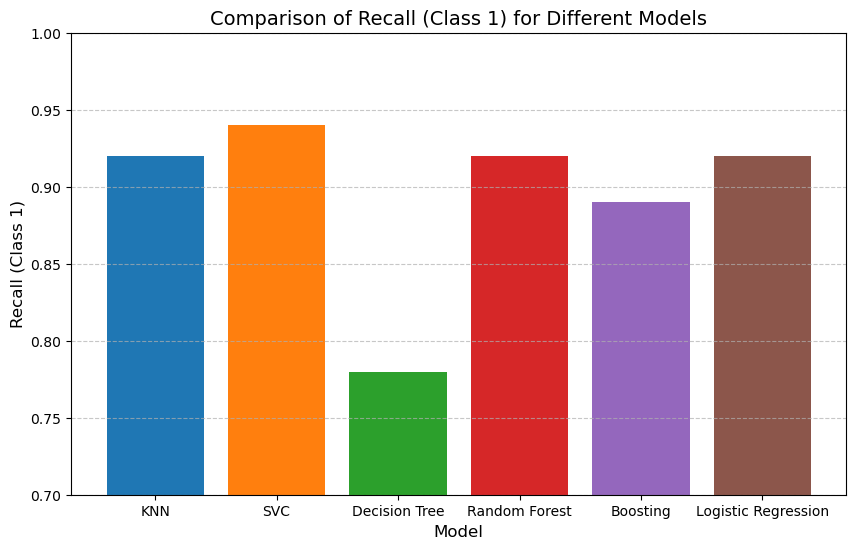

In [260]:
# Data hasil evaluasi model untuk Recall (Class 1)
model_recall_results = {
    "Model": ["KNN", "SVC", "Decision Tree", "Random Forest", "Boosting", "Logistic Regression"],
    "Recall (Class 1)": [0.92, 0.94, 0.78, 0.92, 0.89, 0.92]  # Ganti nilai ini sesuai hasil Anda
}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Buat DataFrame untuk hasil Recall (Class 1)
recall_df = pd.DataFrame(model_recall_results)

# Plot histogram untuk Recall (Class 1)
plt.figure(figsize=(10, 6))
plt.bar(recall_df["Model"], recall_df["Recall (Class 1)"], color=colors)
plt.title("Comparison of Recall (Class 1) for Different Models", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Recall (Class 1)", fontsize=12)
plt.ylim(0.7, 1)  # Batas y-axis dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



Model **KNN** dan **Random Forest** memiliki nilai **Recall (Class 1)** tertinggi (0.75), menunjukkan kemampuan terbaik dalam mendeteksi kelas positif, sedangkan **SVC** dan **Boosting** memiliki recall lebih rendah (0.71), mengindikasikan beberapa kasus positif terlewat.

## Model Evaluation

In [261]:
best_model = SVC(probability=True, random_state=42) # The best model based on previous evaluations
final_clf = Pipeline([('preprocessor', preprocessor), ('classifier', best_model)]).fit(X_train, y_train)
test_accuracy = final_clf.score(X_test, y_test)
print(f"Hasil akurasi pada data uji: {test_accuracy:.2%}") # Create final model and evaluate on test set

Hasil akurasi pada data uji: 89.67%


# viii. Hyperparameter Tuning

## SVM Hyperparameter Tuning

In [262]:
print("\n SVM Hyperparameter Tuning")

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

svm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

grid_svm = GridSearchCV(svm_pipe, param_grid_svm, cv=5, scoring='recall', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print(f"Best Parameters: {grid_svm.best_params_}")
print(f"Best Recall (CV): {grid_svm.best_score_:.4f}")


 SVM Hyperparameter Tuning
Best Parameters: {'classifier__C': 0.1, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly'}
Best Recall (CV): 0.9975


## Decision Tree Hyperparameter Tuning

In [263]:
print("\n Decision Tree Hyperparameter Tuning")

param_grid_dt = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__criterion': ['gini', 'entropy']
}

dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

grid_dt = GridSearchCV(dt_pipe, param_grid_dt, cv=5, scoring='recall', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print(f"Best Parameters: {grid_dt.best_params_}")
print(f"Best Recall (CV): {grid_dt.best_score_:.4f}")



 Decision Tree Hyperparameter Tuning
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 3}
Best Recall (CV): 0.8694


## Random Forest Hyperparameter Tuning

In [264]:
print("\n Random Forest Hyperparameter Tuning")

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7, None]
}

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

grid_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=5, scoring='recall', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best Recall (CV): {grid_rf.best_score_:.4f}")


 Random Forest Hyperparameter Tuning
Best Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 50}
Best Recall (CV): 0.9038


## Gradient Boost Hyperparameter Tuning

In [265]:
print("\n Gradient Boost Hyperparameter Tuning")

param_grid_gb = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7]
}

gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

grid_gb = GridSearchCV(gb_pipe, param_grid_gb, cv=5, scoring='recall', n_jobs=-1)
grid_gb.fit(X_train, y_train)

print(f"Best Parameters: {grid_gb.best_params_}")
print(f"Best Recall (CV): {grid_gb.best_score_:.4f}")



 Gradient Boost Hyperparameter Tuning
Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best Recall (CV): 0.9185


## KNN Hyperparameter Tuning

In [266]:
print("\n KNN Hyperparameter Tuning")

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski', 'manhattan']
}

knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

grid_knn = GridSearchCV(knn_pipe, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print(f"Best Parameters: {grid_knn.best_params_}")
print(f"Best Recall (CV): {grid_knn.best_score_:.4f}")



 KNN Hyperparameter Tuning
Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best Recall (CV): 0.9014


/var/folders/nx/5rf0d08544j82gh3ljbrs7km0000gn/T/ipykernel_2373/2986835141.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


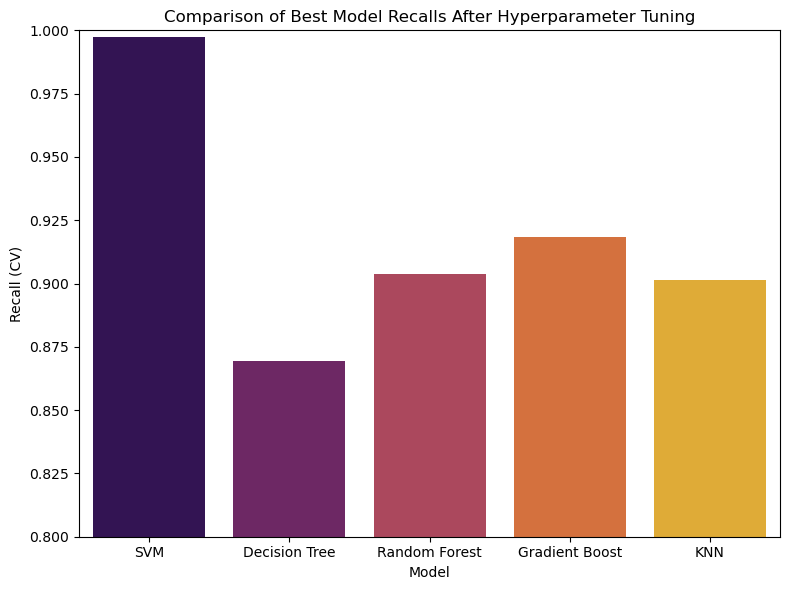

In [267]:
best_summary = pd.DataFrame([
    {'Model': 'SVM', 'Best Recall (CV)': grid_svm.best_score_},
    {'Model': 'Decision Tree', 'Best Recall (CV)': grid_dt.best_score_},
    {'Model': 'Random Forest', 'Best Recall (CV)': grid_rf.best_score_},
    {'Model': 'Gradient Boost', 'Best Recall (CV)': grid_gb.best_score_},
    {'Model': 'KNN', 'Best Recall (CV)': grid_knn.best_score_},
])

# Visualisasi hasil
plt.figure(figsize=(8, 6))
sns.barplot(
    data=best_summary, 
    x='Model', 
    y='Best Recall (CV)', 
    palette='inferno'
)
plt.title('Comparison of Best Model Recalls After Hyperparameter Tuning')
plt.ylabel('Recall (CV)')
plt.xlabel('Model')
plt.ylim(0.8, 1)
plt.tight_layout()
plt.show()

## Evaluasi Ulang SVM Setelah Hyperparameter Tuning 

In [268]:
# Ambil model terbaik dari hasil tuning
best_svm = grid_svm.best_estimator_

# Cross-validation ulang pakai model terbaik
svm_cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5, scoring='recall')

print("\n===== Evaluation After Hyperparameter Tuning (SVM) =====")
print(f"Cross-Validation Recall (mean): {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std():.4f})")

# Evaluasi di data uji
y_pred_svm = best_svm.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Akurasi tambahan biar tahu stabilitas
test_acc = accuracy_score(y_test, y_pred_svm)
print(f"Test Accuracy: {test_acc:.4f}")



===== Evaluation After Hyperparameter Tuning (SVM) =====
Cross-Validation Recall (mean): 0.9975 (+/- 0.0049)

Confusion Matrix:
[[ 17  65]
 [  2 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.21      0.34        82
           1       0.61      0.98      0.75       102

    accuracy                           0.64       184
   macro avg       0.75      0.59      0.54       184
weighted avg       0.73      0.64      0.57       184

Test Accuracy: 0.6359


## Evaluasi Ulang KNN Setelah Hyperparameter Tuning 

In [269]:
# Ambil model terbaik dari hasil tuning
best_knn = grid_knn.best_estimator_

# Cross-validation ulang pakai model terbaik
knn_cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='recall')

print("\n===== Evaluation After Hyperparameter Tuning (KNN) =====")
print(f"Cross-Validation Recall (mean): {knn_cv_scores.mean():.4f} (+/- {knn_cv_scores.std():.4f})")

# Evaluasi di data uji
y_pred_knn = best_knn.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Akurasi tambahan biar tahu stabilitas
test_acc = accuracy_score(y_test, y_pred_knn)
print(f"Test Accuracy: {test_acc:.4f}")



===== Evaluation After Hyperparameter Tuning (KNN) =====
Cross-Validation Recall (mean): 0.9014 (+/- 0.0137)

Confusion Matrix:
[[72 10]
 [ 8 94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

Test Accuracy: 0.9022


## Evaluasi Ulang Decision Tree Setelah Hyperparameter Tuning 

In [270]:
# Ambil model terbaik dari hasil tuning
best_dt = grid_dt.best_estimator_

# Cross-validation ulang pakai model terbaik
dt_cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='recall')

print("\n===== Evaluation After Hyperparameter Tuning (Decision Tree) =====")
print(f"Cross-Validation Recall (mean): {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std():.4f})")

# Evaluasi di data uji
y_pred_dt = best_dt.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Akurasi tambahan biar tahu stabilitas
test_acc = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy: {test_acc:.4f}")



===== Evaluation After Hyperparameter Tuning (Decision Tree) =====
Cross-Validation Recall (mean): 0.8694 (+/- 0.0329)

Confusion Matrix:
[[70 12]
 [21 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        82
           1       0.87      0.79      0.83       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.82      0.82       184

Test Accuracy: 0.8207


## Evaluasi Ulang Random Forest Setelah Hyperparameter Tuning 

In [271]:
# Ambil model terbaik dari hasil tuning
best_rf = grid_rf.best_estimator_

# Cross-validation ulang pakai model terbaik
rf_cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='recall')

print("\n===== Evaluation After Hyperparameter Tuning (Random Forest) =====")
print(f"Cross-Validation Recall (mean): {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std():.4f})")

# Evaluasi di data uji
y_pred_rf = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Akurasi tambahan biar tahu stabilitas
test_acc = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy: {test_acc:.4f}")



===== Evaluation After Hyperparameter Tuning (Random Forest) =====
Cross-Validation Recall (mean): 0.8964 (+/- 0.0356)

Confusion Matrix:
[[67 15]
 [ 7 95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

Test Accuracy: 0.8804


## Evaluasi Ulang Gradient Boost Setelah Hyperparameter Tuning

In [272]:
# Ambil model terbaik dari hasil tuning
best_gb = grid_gb.best_estimator_

# Cross-validation ulang pakai model terbaik
gb_cv_scores = cross_val_score(best_gb, X_train, y_train, cv=5, scoring='recall')

print("\n===== Evaluation After Hyperparameter Tuning (Gradient Boost) =====")
print(f"Cross-Validation Recall (mean): {gb_cv_scores.mean():.4f} (+/- {gb_cv_scores.std():.4f})")

# Evaluasi di data uji
y_pred_gb = best_gb.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Akurasi tambahan biar tahu stabilitas
test_acc = accuracy_score(y_test, y_pred_gb)
print(f"Test Accuracy: {test_acc:.4f}")


===== Evaluation After Hyperparameter Tuning (Gradient Boost) =====
Cross-Validation Recall (mean): 0.9185 (+/- 0.0486)

Confusion Matrix:
[[57 25]
 [10 92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        82
           1       0.79      0.90      0.84       102

    accuracy                           0.81       184
   macro avg       0.82      0.80      0.80       184
weighted avg       0.82      0.81      0.81       184

Test Accuracy: 0.8098


## Model Eval

In [273]:
# Ambil model terbaik dari GridSearchCV
best_model = grid_knn.best_estimator_

# Fit ulang model ke data training
best_model.fit(X_train, y_train)

# Prediksi di data uji
y_pred = best_model.predict(X_test)

# Evaluasi akurasi
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi terbaik pada data uji: {test_accuracy:.2%}")

# Evaluasi lebih detail
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi terbaik pada data uji: 90.22%

Confusion Matrix:
[[72 10]
 [ 8 94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



# ix. Model Saving

In [274]:
# Model terbaik hasil tuning KNN
best_model = grid_knn.best_estimator_

# Simpan model ke file .pkl
with open('final_best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model terbaik (KNN) berhasil disimpan sebagai 'final_best_model.pkl'")

Model terbaik (KNN) berhasil disimpan sebagai 'final_best_model.pkl'


In [275]:
# # Menyimpan model terbaik ke dalam file
# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(grid_search_knn.best_estimator_, f)
# print("Model saved as best_model.pkl")

# x. Model Inference

**Model Inference berada di file sendiri dengan nama file inference.ipynb**

# xi. Pengambilan Kesimpulan



Kesimpulan :

Penyakit jantung merupakan salah satu penyebab utama kematian di Indonesia. Penyakit ini dapat muncul tanpa gejala yang jelas hingga mencapai tahap kritis. Oleh karena itu, deteksi dini risiko penyakit jantung sangat penting untuk mencegah komplikasi lebih lanjut dan meningkatkan kualitas hidup pasien. Namun, penilaian risiko sering kali sulit dilakukan tanpa data medis yang jelas.

Model yang dibangun menunjukkan kinerja sangat baik pada data latih, namun perlu diwaspadai potensi overfitting. Pada data uji, model masih menunjukkan kinerja yang baik. Hasil evaluasi menunjukkan model mampu mengklasifikasikan data dengan akurasi tinggi. Namun, disarankan untuk melakukan evaluasi lebih lanjut dengan teknik seperti cross-validation untuk memastikan model tidak overfitting dan dapat digeneralisasikan dengan baik pada data baru.

KNN dan SVC menunjukan model terbaik diantara yang lainnya dan Decision Tree adalah model terburuk dalam kasus prediksi Serangan Jantung.

Dengan menggunakan data seperti usia, tekanan darah, dan kadar kolesterol, model yang kami buat dapat memprediksi risiko seseorang terkena penyakit jantung. Hasil prediksi ini dapat dilihat langsung melalui aplikasi Streamlit yang mudah digunakan.

Rekomendasi untuk dr Spesialis :

Fokus pada Populasi Berisiko Tinggi:
Prioritaskan evaluasi menyeluruh pada pasien berusia 40-70 tahun, khususnya laki-laki dengan hipertensi (tekanan darah >140 mmHg) atau hiperkolesterolemia (>240 mg/dL). Perhatikan pula pasien dengan nyeri dada yang tidak khas (asymptomatic), karena gejala ini seringkali terabaikan.
Analisis Data yang Lebih Mendalam:
Lakukan validasi data secara cermat, terutama pada nilai-nilai ekstrem seperti kadar kolesterol 0 mg/dL. Implementasikan model prediksi seperti Random Forest untuk mendukung pengambilan keputusan klinis yang lebih akurat.
Pentingnya Edukasi Pasien:
Berikan edukasi kesehatan yang komprehensif kepada pasien mengenai pentingnya modifikasi gaya hidup, termasuk aktivitas fisik teratur dan diet seimbang.

Rekomendasi untuk Pasien :

Deteksi dini dengan aplikasi dan konsultasi rutin ke dokter, serta penerapan gaya hidup sehat, adalah kunci pencegahan dan penanganan penyakit jantung, terutama bagi individu dengan faktor risiko seperti usia, tekanan darah tinggi, dan kadar kolesterol tinggi.